# Exploratory Data Analysis

Section 1 Êï∞ÊçÆÈõÜÂü∫Êú¨ÊÉÖÂÜµÔºàË°åÊï∞„ÄÅÂàóÊï∞„ÄÅÊó∂Èó¥ËåÉÂõ¥Ôºâ„ÄÇ

Section 2 Á±ªÂà´ÂàÜÂ∏ÉÔºàfraud Âç†ÊØîÔºâ  

Section 3 Êó∂Èó¥ÂàÜÂ∏ÉÔºàtrain/valid/test ÁöÑÊó∂Èó¥ÂàáÂàÜÂêàÁêÜÊÄßÔºâ  

Section 4 ÈáëÈ¢ùÂíåÂÖ∂‰ªñÁâπÂæÅÂàÜÂ∏ÉÔºàÈïøÂ∞æ„ÄÅÂÅèÊÄÅÔºâ  

Section 5 ÁâπÂæÅÁõ∏ÂÖ≥ÊÄßÔºàÁÉ≠ÂõæÔºâ  

Section 6 Êï∞ÊçÆË¥®ÈáèÔºàÁº∫Â§±ÂÄº„ÄÅÂºÇÂ∏∏ÂÄºÔºâ

Section 7 Âü∫Á∫øÊåáÊ†áÔºàÈöèÊú∫È¢ÑÊµã AUC-PRÔºâ

In [9]:
%load_ext autoreload
%autoreload 2

In [10]:
import pandas as pd
raw = pd.read_csv("../data/processed/train.csv", parse_dates=["event_time"])
tr = pd.read_csv("../data/processed/train.csv", parse_dates=["event_time"])
va = pd.read_csv("../data/processed/valid.csv", parse_dates=["event_time"])
te = pd.read_csv("../data/processed/test.csv",  parse_dates=["event_time"])

In [11]:
feature_cols = ["Amount"] + [c for c in tr.columns if c.startswith("V")]
X_tr, y_tr = tr[feature_cols], tr["Class"].values
X_va, y_va = va[feature_cols], va["Class"].values
X_te, y_te = te[feature_cols], te["Class"].values

## Êï∞ÊçÆË¥®Èáè

**ÁªìËÆ∫1ÔºöÊï∞ÊçÆÈ´òÂ∫¶‰∏çÂùáË°°, Ê¨∫ËØàÊ°à‰æãÂ§™Â∞ëÔºà‰ªÖÂç†ÊâÄÊúâÊï∞ÊçÆÁöÑ0.1%Ôºâ** <br>
**ÁªìËÆ∫2: ÈáëÈ¢ùÂàÜÂ∏ÉÁ¨¶ÂêàÂ∏∏ÁêÜÔºåÂ§ßÈÉ®ÂàÜÈÉΩÂ∞è‰∫é2000Ê¨ßÂÖÉÔºå ÊúâÊòæËëóÂÅèÊÄÅÂíåÈïøÂ∞æ** <br>
**ÁªìËÆ∫3: Ê≤°ÊúâÁº∫Â§±ÂÄº**

In [12]:
#Á±ªÂà´ÂàÜÂ∏É
print(raw['Class'].value_counts(normalize=True))

Class
0    0.998074
1    0.001926
Name: proportion, dtype: float64


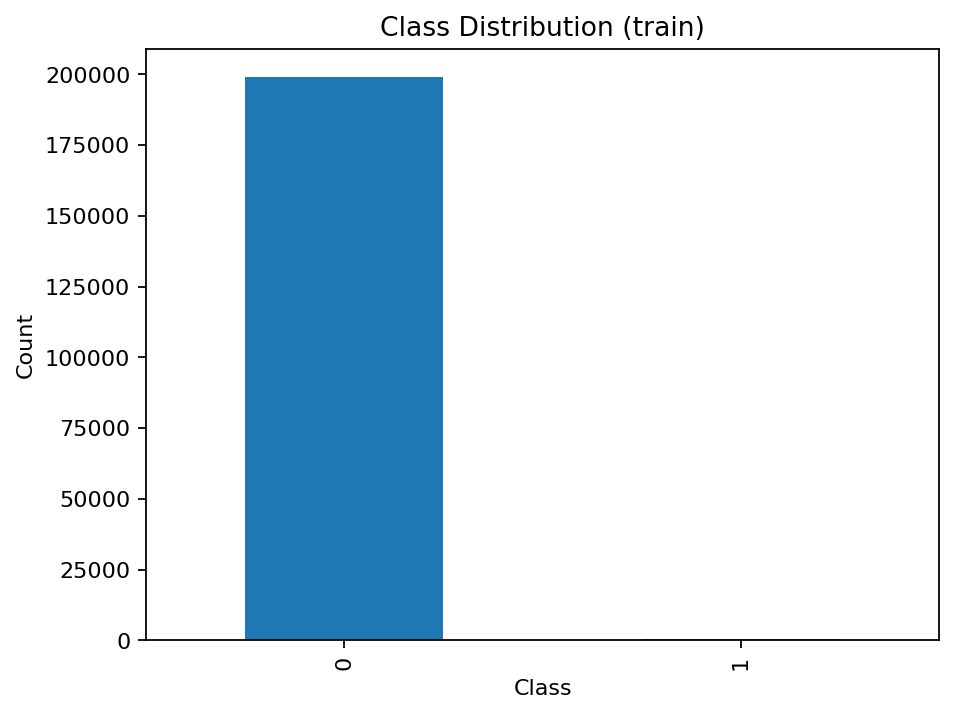

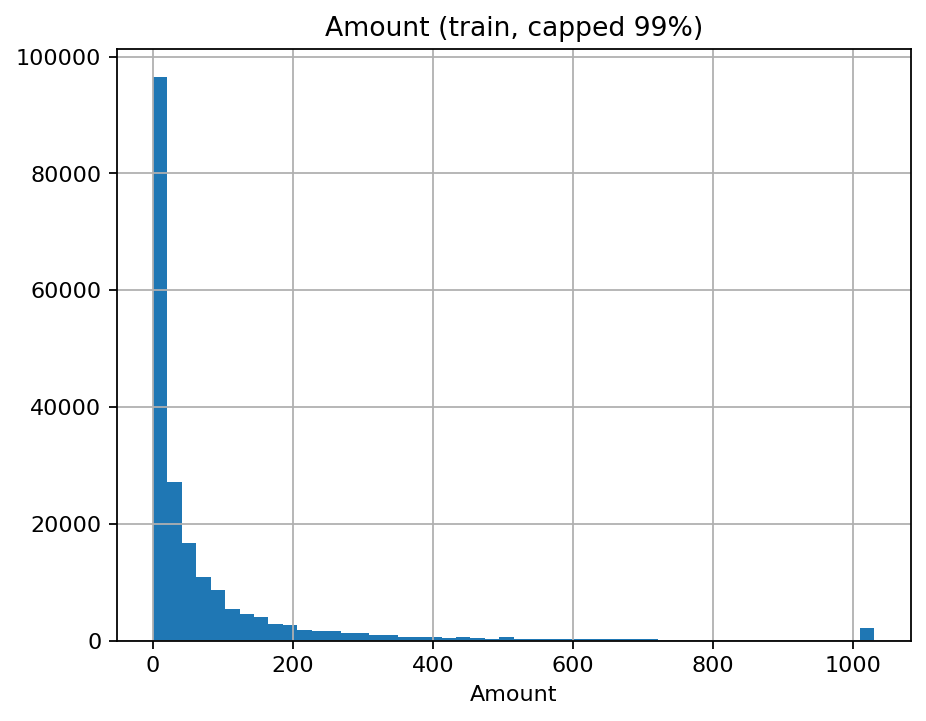

In [13]:
#Á±ªÂà´ÂèäÈáëÈ¢ùÂàÜÂ∏É
from IPython.display import Image, display

display(Image(filename="figures/class_balance.png"))
display(Image(filename="figures/amount_hist.png"))

In [14]:
#Êó∂Èó¥ÂàáÂâ≤ÂêàÁêÜÔºåÊó†ÈáçÂè†
tr["event_time"].max(), va["event_time"].min(), va["event_time"].max(), te["event_time"].min()

(Timestamp('2013-01-02 12:55:29'),
 Timestamp('2013-01-02 12:55:29'),
 Timestamp('2013-01-02 18:02:08'),
 Timestamp('2013-01-02 18:02:09'))

In [15]:
print(raw.isna().sum())
print(raw.describe())

tx_id         0
event_time    0
Amount        0
Class         0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
dtype: int64
               tx_id                     event_time         Amount  \
count  199365.000000                         199365  199365.000000   
mean    99682.000000  2013-01-01 19:34:04.729465856      89.771344   
min         0.000000            2013-01-01 00:00:00       0.000000   
25%     49841.000000            2013-01-01 12:17:18       5.990000   
50%     99682.000000            2013-01-01 18:40:32      23.000000   
75%    149523.000000            2013-01-02 01:23:29    

## ÁâπÂæÅÁõ∏ÂÖ≥ÊÄß

<Axes: >

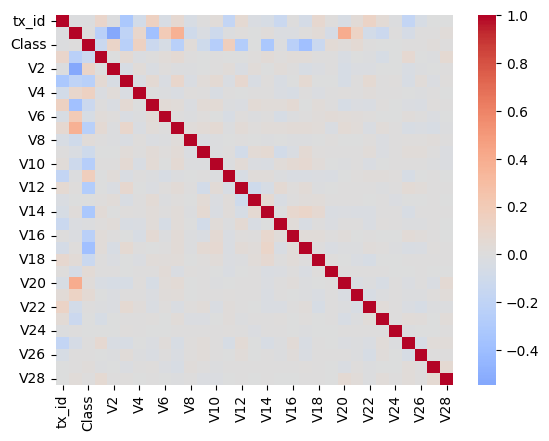

In [16]:
# ÁâπÂæÅÁõ∏ÂÖ≥ÊÄßÁÉ≠Âõæ
import seaborn as sns
corr = tr.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0)

## Baseline
‰∏ãÂõæÂ±ïÁ§∫‰∫ÜÔºö
 - Âπ≥ÂùáÁ≤æÂ∫¶ÔºàAP, ‰πüÂ∞±ÊòØ AUC-PRÔºâÂú®ÊûÅÂ∫¶‰∏çÂùáË°°‰∏ã ‚âà Ê≠£Ê†∑Êú¨Âç†ÊØî„ÄÇÁî®‰ΩúÊ†áÂ∞∫ÂØπÊØî„ÄÇ
 - ÊúÄÂ∞èÂèØË°å LRÔºà‰∏çÈááÊ†∑„ÄÅ‰∏çË∞ÉÂèÇÔºâ

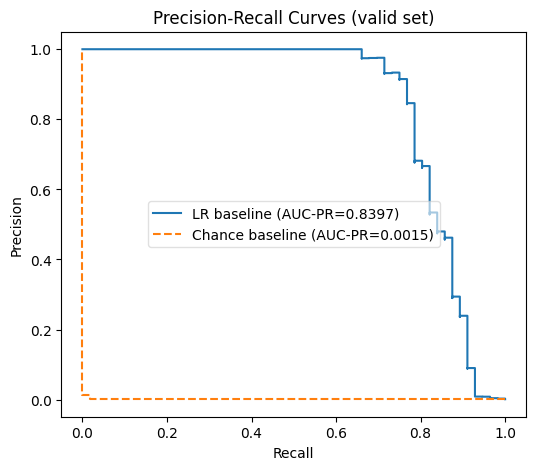

In [17]:
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# ===== Logistic Regression Baseline =====
pipe = Pipeline([
    ("scaler", StandardScaler(with_mean=False)),
    ("lr", LogisticRegression(max_iter=2000, class_weight="balanced", n_jobs=None))
])
pipe.fit(X_tr, y_tr)
proba_lr = pipe.predict_proba(X_va)[:, 1]
ap_lr = average_precision_score(y_va, proba_lr)
p_lr, r_lr, _ = precision_recall_curve(y_va, proba_lr)

# ===== Chance Baseline (Dummy) =====
dc = DummyClassifier(strategy="stratified", random_state=42)
dc.fit(X_tr, y_tr)
proba_dc = dc.predict_proba(X_va)[:, 1]
ap_dc = average_precision_score(y_va, proba_dc)
p_dc, r_dc, _ = precision_recall_curve(y_va, proba_dc)

# ===== Plot both =====
plt.figure(figsize=(6,5))
plt.step(r_lr, p_lr, where="post", label=f"LR baseline (AUC-PR={ap_lr:.4f})")
plt.step(r_dc, p_dc, where="post", linestyle="--", label=f"Chance baseline (AUC-PR={ap_dc:.4f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves (valid set)")
plt.legend(loc="center", framealpha=0.6)
plt.show()




LR baseline ‚Äî ROC-AUC=0.9815, AUC-PR=0.8397


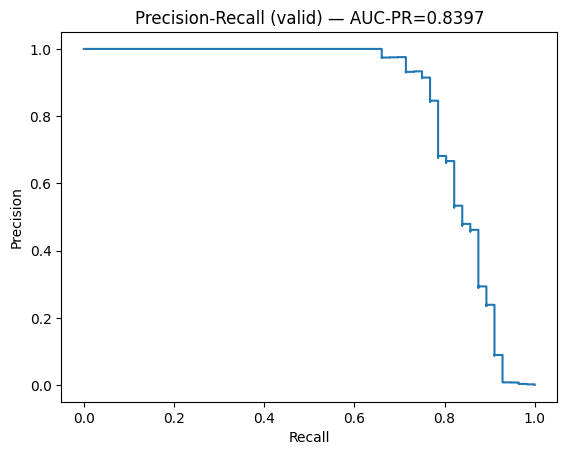

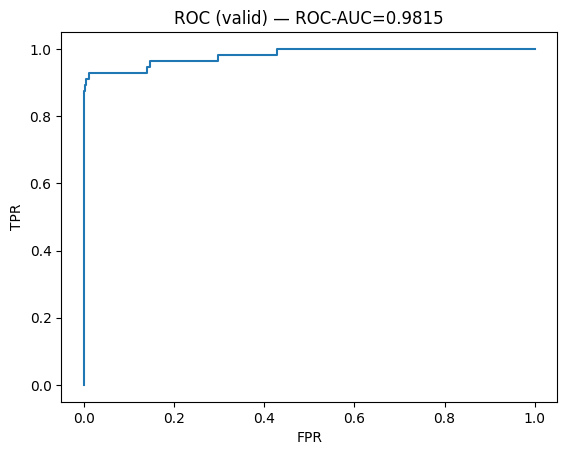

KS: 0.91628969881636
Confusion Matrix @0.5:
 [[41408  1257]
 [    4    52]]


In [18]:
import numpy as np
from sklearn.metrics import (roc_auc_score,
                             roc_curve,
                             confusion_matrix)


# ==== ÊûÑÂª∫ pipeline ====
pipe = Pipeline([
    ("scaler", StandardScaler(with_mean=False)),
    ("lr", LogisticRegression(max_iter=2000, class_weight="balanced"))
])

pipe.fit(X_tr, y_tr)

# ==== È¢ÑÊµã ====
proba = pipe.predict_proba(X_va)[:, 1]

# ==== ÊåáÊ†á ====
roc_auc = roc_auc_score(y_va, proba)
ap = average_precision_score(y_va, proba)

print(f"LR baseline ‚Äî ROC-AUC={roc_auc:.4f}, AUC-PR={ap:.4f}")

# ==== Êõ≤Á∫ø ====
# PR
p, r, _ = precision_recall_curve(y_va, proba)
plt.figure()
plt.step(r, p, where="post")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title(f"Precision-Recall (valid) ‚Äî AUC-PR={ap:.4f}")
plt.savefig("figures/pr_curve_baseline.png", dpi=160, bbox_inches="tight")
plt.show()

# ROC
fpr, tpr, _ = roc_curve(y_va, proba)
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("FPR"); plt.ylabel("TPR")
plt.title(f"ROC (valid) ‚Äî ROC-AUC={roc_auc:.4f}")
plt.savefig("figures/roc_curve_baseline.png", dpi=160, bbox_inches="tight")
plt.show()

# ==== KSÂÄº & Ê∑∑Ê∑ÜÁü©Èòµ ====
ks = np.max(tpr - fpr)
print("KS:", ks)

pred_label = (proba >= 0.5).astype(int)
cm = confusion_matrix(y_va, pred_label)
print("Confusion Matrix @0.5:\n", cm)


**Baselin Interepretation:**
- ROC-AUC ‚âà 0.98
- AUC-PR ‚âà 0.83ÔºàËøúÈ´ò‰∫é fraud rate ‚âà 0.17% ÁöÑÊú∫‰ºöÁ∫ø ‚Üí Ê®°ÂûãÊòæËëóÊúâÊïàÔºâ
- KS ‚âà 0.90ÔºàÈùûÂ∏∏È´ò ‚Üí Ê®°ÂûãËÉΩÂæàÂ•ΩÂú∞Âå∫ÂàÜÊ≠£Ë¥üÁ±ªÔºâ
- FNËøú‰Ωé‰∫éFPÔºåÁ¨¶Âêà‰ø°Ë¥∑È£éÈô©Ê£ÄÊµãÁöÑ‰∫ßÂìÅÊù°‰ª∂ÔºàieÊääÊºèÊä•ÈôçÂà∞ÊúÄ‰ΩéÔºâ
- ‰∏ã‰∏ÄÊ≠•ÔºöÂºïËøõÊõ¥Âº∫Ê®°ÂûãÔºàXGBoost/ightGBMÔºâÔºåÁî®‰∫§ÂèâÈ™åËØÅÔºåÂØπÊØîÁªìÊûú

# Model Development

‰∫ßÂá∫Ôºö

reports/model_metrics.csvÔºöÂ≠òÂÇ®ÂêÑÊ®°ÂûãÊåáÊ†áÔºõ

reports/figures/roc_curve_xgb_lgbm.png„ÄÅpr_curve_xgb_lgbm.pngÔºõ

Notebook ‰∏≠ÁîüÊàê‰∏ÄÂº†ÂØπÊØîË°®Ê†º + ÂõæË°®„ÄÇ


## Model Selection

In [19]:
import sys, os
sys.path.append(os.path.abspath("../src"))

In [20]:
from train import load_processed, build_lr_pipeline, try_build_xgb, try_build_lgbm, ks_stat

# Data Split and features constructed
(X_tr, y_tr), (X_va, y_va), (X_te, y_te), feature_cols = load_processed()

#LR 
model = build_lr_pipeline()
model.fit(X_tr, y_tr)
print("Valid AUC-PR:", average_precision_score(y_va, model.predict_proba(X_va)[:,1]))

scale_pos_weight = (len(y_tr)-sum(y_tr))/sum(y_tr)

models = ['LR', 'XGBoost', 'LGBM']
Model_func = [build_lr_pipeline(), try_build_xgb(scale_pos_weight), try_build_lgbm()]

rows = []

for i in range(len(models)):
    model = Model_func[i]
    model.fit(X_tr, y_tr)
    proba = model.predict_proba(X_va)[:, 1]
    # È™åËØÅÈõÜ
    proba_va = model.predict_proba(X_va)[:, 1]
    va_roc  = roc_auc_score(y_va, proba_va)
    va_ap   = average_precision_score(y_va, proba_va)
    va_ks   = ks_stat(y_va, proba_va)

    # ÊµãËØïÈõÜ
    proba_te = model.predict_proba(X_te)[:, 1]
    te_roc  = roc_auc_score(y_te, proba_te)
    te_ap   = average_precision_score(y_te, proba_te)
    te_ks   = ks_stat(y_te, proba_te)

    rows.append({
            "model": models[i],
            "features": ",".join(feature_cols),
            "valid_roc_auc": float(va_roc),
            "valid_auc_pr": float(va_ap),
            "valid_ks": float(va_ks),
            "test_roc_auc": float(te_roc),
            "test_auc_pr": float(te_ap),
            "test_ks": float(te_ks),
        })

    # Ê±áÊÄªÂà∞Êä•Âëä
    out_df = pd.DataFrame(rows)
    out_df.to_csv( "model_metrics.csv", index=False)
    print("Saved:", "model_metrics.csv")


Valid AUC-PR: 0.8398422043255862
Saved: model_metrics.csv
Saved: model_metrics.csv
[LightGBM] [Info] Number of positive: 384, number of negative: 198981
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011110 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199365, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Saved: model_metrics.csv


In [21]:
out_df

model                                           features  valid_roc_auc  \
0       LR  Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,...       0.981520   
1  XGBoost  Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,...       0.988616   
2     LGBM  Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,...       0.987473   

   valid_auc_pr  valid_ks  test_roc_auc  test_auc_pr   test_ks  
0      0.839842  0.916290      0.976526     0.708247  0.847985  
1      0.857147  0.918352      0.973130     0.765505  0.820176  
2      0.862721  0.919454      0.973290     0.774849  0.838279

Graphs for LGBM (current best model)

roc_curve_xgb_lgbm.png„ÄÅpr_curve_xgb_lgbm.png

[LightGBM] [Info] Number of positive: 384, number of negative: 198981
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010485 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199365, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


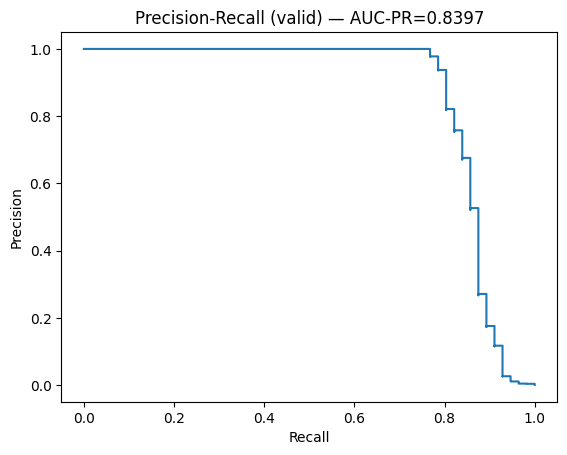

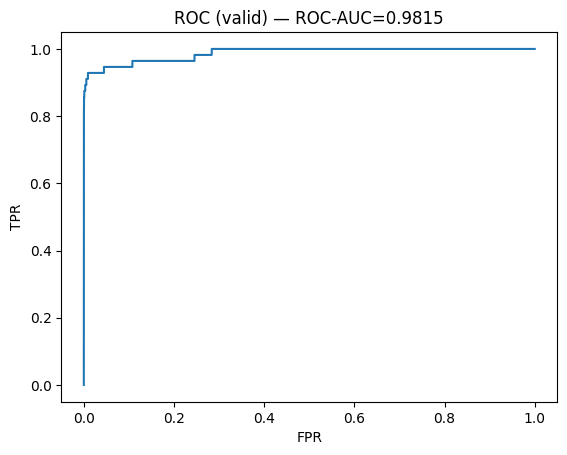

In [22]:
model = try_build_lgbm()
model.fit(X_tr, y_tr)
proba = model.predict_proba(X_va)[:, 1]

# PR
p, r, _ = precision_recall_curve(y_va, proba) # precision, recall, threshold
plt.figure()
plt.step(r, p, where="post")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title(f"Precision-Recall (valid) ‚Äî AUC-PR={ap:.4f}")
plt.savefig("figures/roc_curve_xgb_lgbm.png", dpi=160, bbox_inches="tight")
plt.show()

# ROC
fpr, tpr, _ = roc_curve(y_va, proba)
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("FPR"); plt.ylabel("TPR")
plt.title(f"ROC (valid) ‚Äî ROC-AUC={roc_auc:.4f}")
plt.savefig("figures/pr_curve_xgb_lgbm.png", dpi=160, bbox_inches="tight")
plt.show()

## Cross-Validation

üéØ Day 5 ÁõÆÊ†á

Âú® CV ‰∏≠ÂØπÊØîÔºöno-sampling / class_weight / RandomUnderSampler / SMOTEÔºàÂèØÈÄâÂÜçÂä† SMOTEENNÔºâ„ÄÇÔºàÁ±ªÂà´‰∏çÂπ≥Ë°°ÁöÑÂ∏∏ËßÅÂ§ÑÁêÜÊñπÊ≥ïÔºâ

- no samplingÔºö‰ªÄ‰πàÈÉΩ‰∏çÂÅöÁõ¥Êé•train
- class-weightÔºöÁªôÂ∞ëÊï∞Á±ªÊ†∑Êú¨Êõ¥È´òÊùÉÈáçÔºàbaselineÔºâ
- RandomUnderSamplerÔºöÈöèÊú∫ÈááÊ†∑Ôºå‰Ωø‰∏çÂêåÁ±ªÂûãÊ†∑Êú¨Êï∞ÊçÆÈáèÁõ∏‰ºº
- SMOTEÔºö‰∏çÊòØÁÆÄÂçïÂ§çÂà∂Â∞ëÊï∞Á±ªÔºåËÄåÊòØÂú®Â∞ëÊï∞Á±ªÊ†∑Êú¨‰πãÈó¥ÊèíÂÄºÁîüÊàê‚ÄúÂêàÊàêÊ†∑Êú¨‚Äù„ÄÇ
- SMOTEENNÔºöÂú® SMOTE ËøáÈááÊ†∑‰πãÂêéÔºåÂÜçÁî® Edited Nearest Neighbour (ENN) ÊñπÊ≥ïÊ∏ÖÁêÜËæπÁïåÊ†∑Êú¨
    - ENN: Â¶ÇÊûú‰∏Ä‰∏™Ê†∑Êú¨ÁöÑÁ±ªÂà´ÂíåÂÆÉ k ‰∏™ÊúÄËøëÈÇªÁöÑÂ§öÊï∞Á±ªÂà´‰∏ç‰∏ÄËá¥ÔºåÂ∞±Âà†ÊéâÂÆÉ„ÄÇ

‰ª• AUC-PR ‰∏∫‰∏ªËØÑÂàÜÔºåËæìÂá∫ÂØπÊØîË°®„ÄÇ


In [23]:
sys.argv = ["imbalance.py", "--folds", "5"]  # Ê®°ÊãüÂëΩ‰ª§Ë°åÂèÇÊï∞
from imbalance import main
main()

Fatal Python error: init_import_site: Failed to import the site module
Python runtime state: initialized
Could not import runpy module
Traceback (most recent call last):
Traceback (most recent call last):
  File "<frozen runpy>", line 189, in _run_module_as_main
  File "<frozen runpy>", line 112, in _get_module_details
  File "/Users/sarah/Downloads/risk-ml-suite/.venv/lib/python3.13/site-packages/joblib/__init__.py", line 114, in <module>
    from ._cloudpickle_wrapper import wrap_non_picklable_objects
  File "/Users/sarah/Downloads/risk-ml-suite/.venv/lib/python3.13/site-packages/joblib/_cloudpickle_wrapper.py", line 14, in <module>
    from .externals.loky import wrap_non_picklable_objects
  File "/Users/sarah/Downloads/risk-ml-suite/.venv/lib/python3.13/site-packages/joblib/externals/loky/__init__.py", line 21, in <module>
    from .reusable_executor import get_reusable_executor
  File "/Users/sarah/Downloads/risk-ml-suite/.venv/lib/python3.13/site-packages/joblib/externals/loky/re

KeyboardInterrupt: 

## ÈòàÂÄº‰ºòÂåñ
Âü∫‰∫é config.yaml ÁöÑ ÊàêÊú¨Áü©Èòµ ‰ºòÂåñÈòàÂÄºÔºåÂÅö ¬±50% FN ÊàêÊú¨ÁÅµÊïèÂ∫¶ÂàÜÊûêÔºõÁªôÂá∫ Recall@Precision‚â•0.90„ÄÇ

Âõ∫ÂåñÁªìÊûúÂà∞ reports/Ôºå‰∏∫ Dashboard Âíå Day 6/7 ÂÅöÂáÜÂ§á„ÄÇ

**ÂéüÂõ†Ôºö** Â§ßÂ§öÊï∞ÂàÜÁ±ªÊ®°ÂûãËæìÂá∫ÁöÑÊòØÊ¶ÇÁéáÔºà0Âà∞1ÁöÑÂÄºÔºâÔºå‰ΩÜÂú®‰∏öÂä°‰∏≠ÔºåÊàë‰ª¨ÊúÄÁªàË¶ÅÂÅö‰∫åÂàÜÁ±ªÂÜ≥Á≠ñÔºåÂõ†Ê≠§ÂøÖÈ°ªÂÜ≥ÂÆö‰∏Ä‰∏™ÈòàÂÄºÔºåÂ§ß‰∫éÁ≠â‰∫éËøô‰∏™ÈòàÂÄºÁöÑÊó∂ÂÄôÔºåÂà§ÂÆö‰∏∫1„ÄÇÈòàÂÄº‰ºòÂåñÁöÑÁõÆÊ†áÂ∞±ÊòØÊ†πÊçÆ‰∏öÂä°ÁõÆÊ†áÔºàÊúÄÂ§ßÂåñÊî∂Áõä/ÊúÄÂ∞èÂåñÊçüÂ§±/Êª°Ë∂≥ÂÖ∑‰ΩìconstrainsÔºâÊù•ÈÄâÊã©‰∏Ä‰∏™ÊúÄÂêàÈÄÇÁöÑÈòàÂÄº

**‰∏öÂä°ÊÑè‰πâÔºö**
- Èôç‰ΩéÊÄª‰ΩìÈ£éÈô©ÊàêÊú¨Ôºàbetween fpÊàêÊú¨ÂíåfnÊàêÊú¨Ôºâ
- Êª°Ë∂≥ÁõëÁÆ°/ÂÜÖÈÉ®È£éÊéßË¶ÅÊ±Ç
- ÊèêÂçá‰∏öÂä°Á≠ñÁï•ÂèØËß£ÈáäÊÄß

ÊÄé‰πàÂÅö
- ‰ªé models/ ËΩΩÂÖ•‰Ω† Day 4 ÁöÑÊúÄ‰Ω≥Ê®°ÂûãÔºàÊàñÁõ¥Êé•Áî®ÂΩìÂâçÊúÄ‰ºò LRÔºâ„ÄÇ
- Âú® valid ÈõÜ‰∏äÊ†πÊçÆ config.yaml ‰∏≠ÁöÑÊàêÊú¨Áü©ÈòµÊêúÁ¥¢ÈòàÂÄº„ÄÇ
- ÂÅö FN ÊàêÊú¨ ¬±50% ÁöÑÁÅµÊïèÂ∫¶ÂàÜÊûêÔºåÁîªÂá∫ÈòàÂÄº-ÊúüÊúõÊàêÊú¨Êõ≤Á∫ø„ÄÇ
- ËÆ°ÁÆó Recall@Precision‚â•0.90ÔºàÊàñ‰Ω†ÁõÆÊ†áÁöÑ 0.75/0.90 ÂèåÁ∫øÔºâ„ÄÇ

*Note: Êàë‰ª¨ËøôÈáåÁî®ÁöÑÊòØÊâãÂ∑•Ê≥ï‰ºòÂåñÈòàÂÄºÔºàÂú®config.yaml‰∏≠ÂÆö‰πâÂÜ≥Á≠ñÊàêÊú¨ÔºâÔºå‰πüÂèØ‰ª•Âà©Áî®scikit-learn‰∏≠ÁöÑTunedThresholdClassifierCV*


In [24]:
import joblib
from threshold import optimize_threshold, sensitivity_analysis, plot_sensitivity, threshold_nodes
from utils import load_config
from __future__ import annotations

In [25]:
import sys
from pathlib import Path
sys.path.append(str(Path().resolve().parents[0]))  # ÊääÈ°πÁõÆÊ†πÁõÆÂΩïÂä†ËøõÊù•

cfg = load_config('../config.yaml')
model = try_build_lgbm()
model.fit(X_tr, y_tr)
predict_va = model.predict_proba(X_va)[:, 1]
predict_te = model.predict_proba(X_te)[:, 1]

[LightGBM] [Info] Number of positive: 384, number of negative: 198981
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018804 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199365, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


ÊúÄ‰ºòÈòàÂÄº

In [26]:
# === 1. ÈòàÂÄº‰ºòÂåñ ===
thr, cost = optimize_threshold(y_va, predict_va, cfg["costs"])
print("ÊúÄ‰Ω≥ÈòàÂÄº:", thr, "ÊàêÊú¨:", cost)


ÊúÄ‰Ω≥ÈòàÂÄº: 0.01 ÊàêÊú¨: 9085.0


ÁÅµÊïèÂ∫¶ÂàÜÊûê

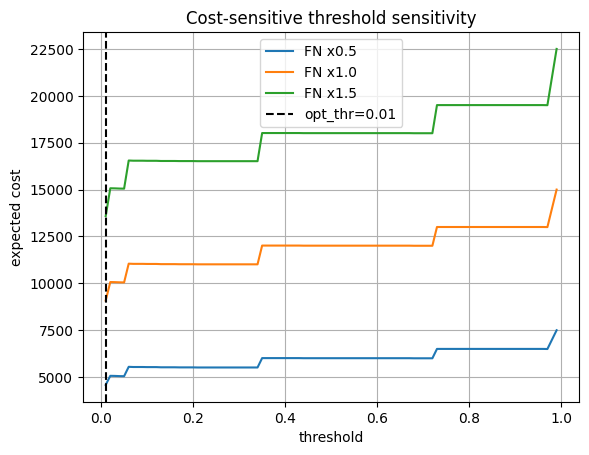

In [27]:
# === 2. ÁÅµÊïèÂ∫¶ÂàÜÊûê ===
df = sensitivity_analysis(y_va, predict_va, cfg["costs"])
plot_sensitivity(df, "figures/threshold_sensitivity.png", opt_thr=thr)

Test Set‰∏≠ÈòàÂÄºÂÖ≥ÈîÆËäÇÁÇπ

In [28]:
# === 3. ÂØºÂá∫ÂÖ≥ÈîÆÈòàÂÄºËäÇÁÇπ ===
nodes = threshold_nodes(y_te, predict_te, [0.5, thr, 0.9])
nodes.to_csv("threshold_nodes.csv", index=False)
nodes

thr  precision    recall  tp  fp  fn     tn
0  0.50   0.866667  0.750000  39   6  13  42663
1  0.01   0.579710  0.769231  40  29  12  42640
2  0.90   0.928571  0.750000  39   3  13  42666

Recall@Precision >= 0.75 or 0.9

ËÉåÊôØËÆæÂÆöÔºöÂÅáËÆæ‰∏öÂä°‰∏çÂÖÅËÆ∏ËØØÊä•Â§™Â§öÔºåÊàë‰ª¨Âú®ÁªôÂÆöÁöÑËØØÊä•Âå∫ÂüüÂÜÖÔºåËÉΩËææÂà∞ÊúÄÈ´òÁöÑÂè¨ÂõûÊòØÂ§öÂ∞ë

In [29]:
p, r, t = precision_recall_curve(y_te, predict_te) #precision, recall, threshold

r_at_p = dict()

for target_p in [0.5, 0.75, 0.90]:
    mask = p[:-1] >= target_p
    recall_at_p = r[:-1][mask].max() if mask.any() else 0.0
    print(f"Recall@Precision‚â•{target_p:.2f} = {recall_at_p:.3f}")
    r_at_p[target_p] = recall_at_p


Recall@Precision‚â•0.50 = 0.788
Recall@Precision‚â•0.75 = 0.750
Recall@Precision‚â•0.90 = 0.750


## Risk Memo for test set

	1.	Ë°®Ê†ºÊ±áÊÄª
	‚Ä¢	Êää test ‰∏äÁöÑÊúÄÁªàÁªìÊûúÔºàÊúÄ‰Ω≥ÈòàÂÄº„ÄÅPrecision„ÄÅRecall„ÄÅF1„ÄÅÊúüÊúõÊàêÊú¨„ÄÅRecall@P‚â•0.75/0.90ÔºâÊ±áÊÄªÂà∞‰∏ÄÂº†Ë°®Ôºàreports/threshold_summary.csvÔºâÔºå‰æø‰∫é Day 9 ÂÜô Risk Memo„ÄÇ
	2.	ÂèØËßÜÂåñÔºàÂä†ÂàÜÈ°πÔºâ
	‚Ä¢	Èô§‰∫ÜÊàêÊú¨Êõ≤Á∫øÔºåÂèØ‰ª•È°∫‰æøÁîª‰∏ÄÂº† PR Êõ≤Á∫ø + ÊúÄ‰ºòÈòàÂÄºÁÇπ Ê†áÊ≥®Âú®Âõæ‰∏äÔºåÊõ¥Áõ¥ËßÇ„ÄÇ

In [30]:
# Ë°®Ê†ºÊ±áÊÄªÁõÆÂâçmodelÂú®test‰∏äÁöÑË°®Áé∞
from threshold import expected_cost

exp_c = expected_cost(y_te, predict_te, thr, cfg["costs"])

pred = (predict_te >= thr).astype(int)
tn, fp, fn, tp = confusion_matrix(y_te, pred).ravel()
P = tp / max(tp+fp,1); R = tp / max(tp+fn,1)

test_sum = [
    ("Best_thr", thr),
    ("Expectec_cost", exp_c),
    ("Precision@thr", P),
    ("Recall@thr", R),
    ("Recall@P>=0.75", r_at_p[0.75]),
    ("Recall@P>=0.9", r_at_p[0.9]),
]

test_df = pd.DataFrame(test_sum, columns=["Metric", "Value"])

test_df

Metric         Value
0        Best_thr      0.010000
1   Expectec_cost  12145.000000
2   Precision@thr      0.579710
3      Recall@thr      0.769231
4  Recall@P>=0.75      0.750000
5   Recall@P>=0.9      0.750000

Precision-RecallÊõ≤Á∫øÂõæ

- Êú∫‰ºöÊ∞¥Âπ≥ÔºàprevalenceÔºâÔºöÊ≠£Ê†∑Êú¨Âç†ÊØî - ÂÅáËÆæÊàë‰ª¨Ê†πÊçÆËøô‰∏™Ê¶ÇÁéáËøõË°årandom guessÔºåÂÆÉÁöÑprecisionÂ∞±ÊòØÂú®ËøôÊù°Á∫ø‰∏ä„ÄÇÂõ†Ê≠§Ë∂äÈ´ò‰∫éËøôÊù°Á∫øÔºåÊ®°ÂûãË∂äÊúâ‰ª∑ÂÄº
- ÁêÜÊÉ≥ÊÉÖÂÜµÁöÑthresholdÂèñÂÜ≥‰∫éÔºö‰∏öÂä°ÁõÆÊ†á/Á≠ñÁï•ÔºåÊàêÊú¨Áü©ÈòµÔºåÁõëÁÆ°/kpi


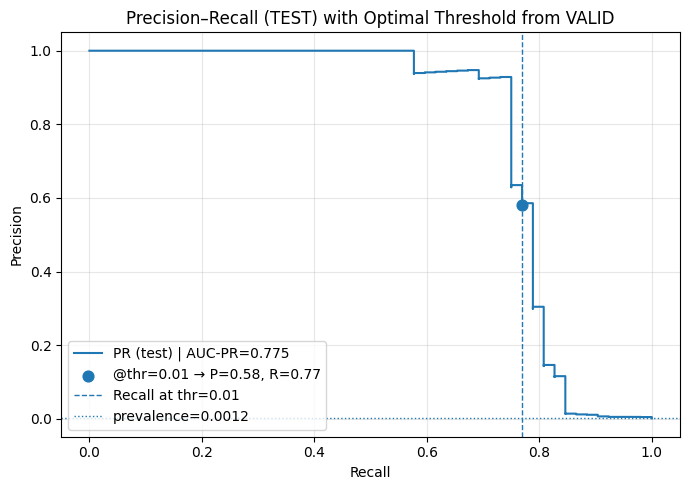

In [31]:
ap = average_precision_score(y_te, predict_te)

# Ê≥®ÊÑèÔºöprecision_recall_curve ËøîÂõûÁöÑ thresholds ÈïøÂ∫¶ÊØî precision/recall Â∞ë 1
idx = np.argmin(np.abs(t - thr))
r_at = r[idx]         # ËØ•ÈòàÂÄº‰∏ãÁöÑ Recall
p_at = p[idx]         # ËØ•ÈòàÂÄº‰∏ãÁöÑ Precision
prev = y_te.mean()  # Ê≠£Ê†∑Êú¨Âç†ÊØîÔºàÊú∫‰ºöÁ∫øÔºâ

plt.figure(figsize=(7,5))
plt.step(r, p, where="post", label=f"PR (test) | AUC-PR={ap:.3f}")
plt.scatter([r_at], [p_at], s=60, zorder=3, label=f"@thr={thr:.2f} ‚Üí P={p_at:.2f}, R={r_at:.2f}")

# Á´ñÁõ¥ËôöÁ∫øÔºöÊ†áËÆ∞ÊúÄ‰ºòÈòàÂÄºÂØπÂ∫îÁöÑ Recall
plt.axvline(r_at, linestyle="--", linewidth=1, label=f"Recall at thr={thr:.2f}")

# Ê∞¥Âπ≥ËôöÁ∫øÔºöÊú∫‰ºöÊ∞¥Âπ≥ÔºàÊ≠£Ê†∑Êú¨Âç†ÊØîÔºâ
plt.axhline(prev, linestyle=":", linewidth=1, label=f"prevalence={prev:.4f}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision‚ÄìRecall (TEST) with Optimal Threshold from VALID")
plt.legend(loc="lower left")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Analysis and Reporting

üéØ Day 6 ÁõÆÊ†á



‰∏öÂä°Á≠ñÁï•Âª∫ËÆÆ

‰ªé SHAP ÊèêÁÇºÂá∫Âá†Êù°‰∫∫ËÉΩÁúãÊáÇÁöÑÈ£éÊéßËßÑÂàôÔºàÂ¶ÇÔºöÂ§ßÈ¢ù‰∫§Êòì„ÄÅÊ∑±Â§ú‰∫§Êòì„ÄÅÁâπÂæÅ X>ÈòàÂÄº ‚Üí ‰ºòÂÖàÂÆ°Ê†∏Ôºâ„ÄÇ

Ëøô‰ºöÂú® Day 9 È£éÊéßÂ§áÂøòÂΩïÈáåÁî®Âà∞„ÄÇ

‚úÖ Day 6 ‰∫ßÂá∫ / ËææÊ†áÈó®Êßõ / ‰∏ã‰∏ÄÊ≠•

‰∫ßÂá∫Áâ©

reports/figures/calibration_curves.png

reports/figures/shap_summary_bar.png

reports/figures/shap_summary_dot.png

reports/figures/shap_force_example.png

Notebook ÊñáÊú¨ÂçïÂÖÉÈáåÁöÑ 3‚Äì5 Êù°‰∏öÂä°Á≠ñÁï•Âª∫ËÆÆ

ËææÊ†áÈó®Êßõ

Âú® test ‰∏äÂØπÊØî raw / Platt / Isotonic Ê¶ÇÁéáÂàÜÂ∏É & Brier score

Ëá≥Â∞ëÁîüÊàê ‰∏ÄÂº†ÂÖ®Â±Ä SHAP Âõæ Âíå ‰∏Ä‰∏™Â±ÄÈÉ®Ëß£Èáä

‰ªéÁªìÊûúÊèêÁÇºÂá∫‰∏öÂä°ÂèØÊâßË°åÁöÑÂêØÂèë

- Ê†°ÂáÜËÆ©Ê®°ÂûãÁöÑÈ¢ÑÊµãÊ¶ÇÁéá‚ÄúÊõ¥ÂèØ‰ø°‚ÄùÔºåÂ∏ÆÂä©‰Ω†Âú® ÈòàÂÄº+ÊàêÊú¨ÊïèÊÑü‰ºòÂåñ Âú∫ÊôØ‰∏ãÊõ¥Â•ΩÂÜ≥Á≠ñ„ÄÇ
- SHAPËÆ©Ê®°Âûã‚ÄúÊõ¥ÈÄèÊòé‚ÄùÔºåÂ∏ÆÂä©‰Ω†Âú® Ëß£Èáä+ÂêàËßÑ+‰∏öÂä°ÁêÜËß£ Âú∫ÊôØ‰∏ãÊõ¥Â•ΩËêΩÂú∞„ÄÇ


## Ê†°ÂáÜ

‰∏∫‰ªÄ‰πàÔºöÂ§ßÂ§öÊï∞Ê®°ÂûãÁöÑËæìÂá∫‚ÄúÂàÜÊï∞‚Äù ‚â† ÁúüÊ≠£ÁöÑÊ¶ÇÁéáÔºàÂ∞§ÂÖ∂Âú®ÊûÅÂ∫¶‰∏çÂùáË°°‰ªªÂä°ÈáåÔºâ„ÄÇ

ÊñπÊ≥ïÔºöPlatt scalingÔºàÈÄªËæëÂõûÂΩíÔºâ / Isotonic regression„ÄÇ

‰∫ßÂá∫ÔºöÊ†°ÂáÜÊõ≤Á∫øÂõæ„ÄÅBrier score ÂØπÊØî„ÄÇ

In [32]:
# Calibration
from calibration_shap import _evaluate_probs, _plot_calibration_curves

/Users/sarah/Downloads/risk-ml-suite/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [33]:
model

LGBMClassifier(class_weight='balanced', colsample_bytree=0.8,
               learning_rate=0.05, n_estimators=400, n_jobs=-1,
               objective='binary', random_state=42, subsample=0.8)

In [35]:
p_platt, p_iso, cali_df = _evaluate_probs(model, X_va, y_va, X_te, y_te, predict_te)
cali_df

/Users/sarah/Downloads/risk-ml-suite/.venv/lib/python3.13/site-packages/sklearn/calibration.py:330: FutureWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/Users/sarah/Downloads/risk-ml-suite/.venv/lib/python3.13/site-packages/sklearn/calibration.py:330: FutureWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


model     brier   roc_auc    auc_pr
0  Isotonic  0.000402  0.976023  0.738169
1     Platt  0.000410  0.973290  0.774849
2       Raw  0.000437  0.973290  0.774849

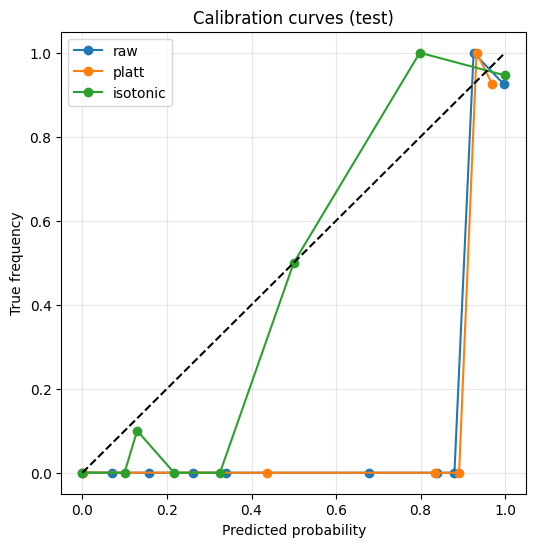

In [ ]:
_plot_calibration_curves(predict_te, p_platt, p_iso, y_te)

## SHAP

SHAPÂÄºÁöÑ‰∏ªË¶ÅÊÄùÊÉ≥Â∞±ÊòØShapleyÂÄºÔºåShapleyÂÄºÊòØ‰∏Ä‰∏™Êù•Ëá™Âêà‰ΩúÂçöÂºàËÆ∫Ôºàcoalitional game theoryÔºâÁöÑÊñπÊ≥ïÔºåÁî±ShapleyÂú®1953Âπ¥ÂàõÈÄ†ÁöÑShapleyÂÄºÊòØ‰∏ÄÁßçÊ†πÊçÆÁé©ÂÆ∂ÂØπÊÄªÊîØÂá∫ÁöÑË¥°ÁåÆÊù•‰∏∫Áé©ÂÆ∂ÂàÜÈÖçÊîØÂá∫ÁöÑÊñπÊ≥ïÔºåÁé©ÂÆ∂Âú®ËÅîÁõü‰∏≠Âêà‰ΩúÂπ∂‰ªéËøôÁßçÂêà‰Ωú‰∏≠Ëé∑Âæó‰∏ÄÂÆöÁöÑÊî∂Áõä„ÄÇÁî®shaplyÂÄºÂéªËß£ÈáäÊú∫Âô®Â≠¶‰π†ÁöÑÈ¢ÑÊµãÁöÑËØùÔºåÂÖ∂‰∏≠‚ÄúÊÄªÊîØÂá∫‚ÄùÂ∞±ÊòØÊï∞ÊçÆÈõÜÂçï‰∏™ÂÆû‰æãÁöÑÊ®°ÂûãÈ¢ÑÊµãÂÄºÔºå‚ÄúÁé©ÂÆ∂‚ÄùÊòØÂÆû‰æãÁöÑÁâπÂæÅÂÄºÔºå‚ÄúÊî∂Áõä‚ÄùÊòØËØ•ÂÆû‰æãÁöÑÂÆûÈôÖÈ¢ÑÊµãÂáèÂéªÊâÄÊúâÂÆû‰æãÁöÑÂπ≥ÂùáÈ¢ÑÊµã„ÄÇ

ÂÖ®Â±ÄËß£ÈáäÔºöÂì™‰∏™ÁâπÂæÅÊúÄÈáçË¶ÅÔºüÔºà‰æãÂ¶Ç V14, V17, AmountÔºâ

Â±ÄÈÉ®Ëß£ÈáäÔºöÂçï‰∏Ä‰∫§Êòì‰∏∫‰ªÄ‰πàË¢´Âà§‰∏∫ fraudÔºü

‰∫ßÂá∫ÔºöSHAP summary plot + force plot„ÄÇ


In [ ]:
# Shap
from calibration_shap import shap_val, plot_shap_summary_bar, plot_shap_distribution_dot, explain_transaction

In [ ]:
explainer, shap = shap_val(model, X_te)

/Users/sarah/Downloads/risk-ml-suite/.venv/lib/python3.13/site-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


In [ ]:
np.save("shap_values_sample.npy", shap)

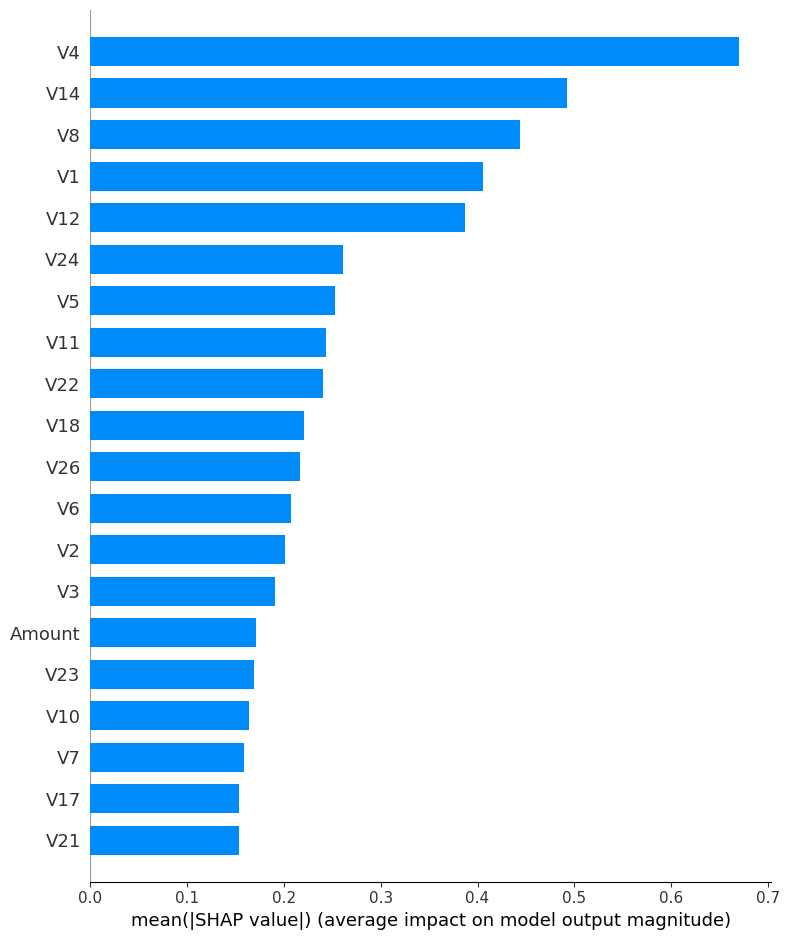

In [ ]:
plot_shap_summary_bar(shap, X_te)

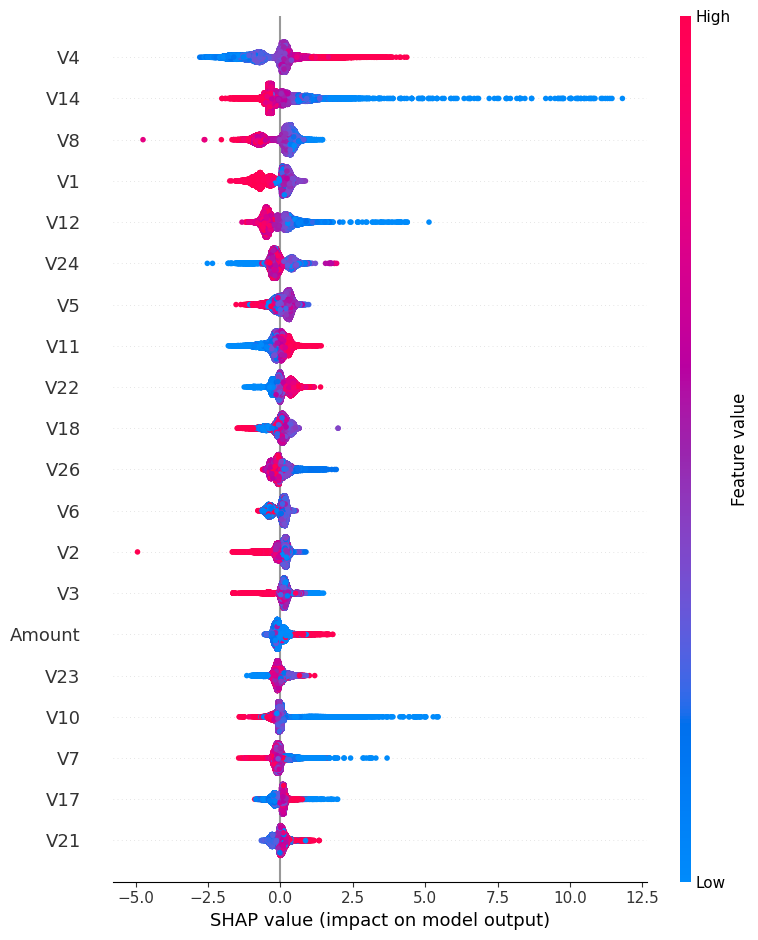

In [ ]:
plot_shap_distribution_dot(shap, X_te)

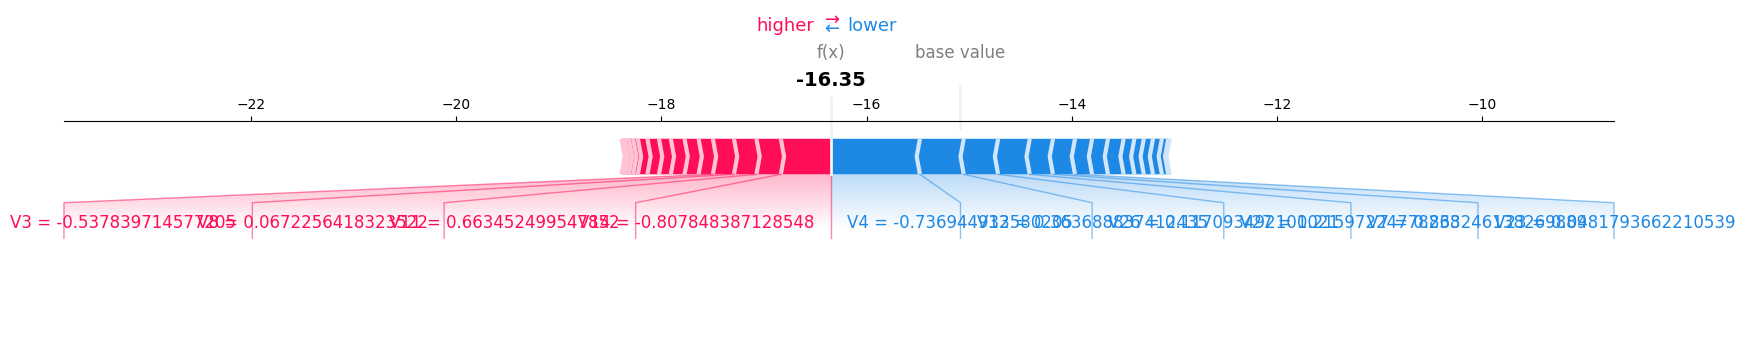

<Figure size 640x480 with 0 Axes>

In [ ]:
explain_transaction(explainer, shap, X_te, 100) # explain 100th transaction

In [ ]:
out_df

model                                           features  valid_roc_auc  \
0       LR  Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,...       0.981520   
1  XGBoost  Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,...       0.988616   
2     LGBM  Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,...       0.987473   

   valid_auc_pr  valid_ks  test_roc_auc  test_auc_pr   test_ks  
0      0.839842  0.916290      0.976526     0.708247  0.847985  
1      0.857147  0.918352      0.973130     0.765505  0.820176  
2      0.862721  0.919454      0.973290     0.774849  0.838279

In [ ]:
cali_df

model     brier   roc_auc    auc_pr
0  Isotonic  0.000402  0.976023  0.738169
1     Platt  0.000410  0.973290  0.774849

# ‰∏öÂä°Á≠ñÁï•Âª∫ËÆÆ

*‰æãÂ≠êÔºö‚ÄúÂõ†‰∏∫ [ÊåáÊ†á/Ëß£ÈáäÁªìÊûú]ÔºåÊâÄ‰ª•Âú®‰∏öÂä°‰∏ä [Â∫îËØ•ÊÄé‰πàÂÅö]ÔºåÂ∏¶Êù• [ËäÇÁúÅ/È£éÈô©Èôç‰Ωé/ÂêàËßÑÊî∂Áõä]„ÄÇ‚Äù*

1. Âõ†‰∏∫LGBMÁöÑAUC_PR = 0.77Ôºå‰∏∫ÊâÄÊúâÊ®°Âûã‰∏≠ÊúÄÈ´òÔºåÂ±ïÁé∞‰∫ÜÂÖ∂Âú®ÊûÅÂ∫¶‰∏çÂùáË°°‰ªªÂä°Èáå‰ªçÁÑ∂ËÉΩÁ≤æÂáÜËØÜÂà´fraudÁöÑËÉΩÂäõÔºåÊâÄ‰ª•Âú®‰∏öÂä°‰∏≠ÈÄâÊã©LGBM‰Ωú‰∏∫Ê£ÄÊµãÊ¨∫ËØàÁöÑ‰∏ªÊ®°ÂûãÔºåÂáèÂ∞ë‰∫∫Â∑•ÂÆ°Ê†∏Èáè„ÄÇ
2. ‰ªéÈòàÂÄº‰ºòÂåñÂú®test dataset‰∏äÁöÑfnÊï∞ÊçÆÂíåÁÅµÊïèÂ∫¶graphÔºåÂæóÂá∫ÊúÄ‰ºòÈòàÂÄºÔºà0.01ÔºâÂØπfn‰ª•ÂèäÊàêÊú¨‰∏äÊÄª‰ΩìÂπ∂‰∏çÊïèÊÑüÔºåÂü∫Êú¨‰øùÊåÅ‰∏ÄËá¥ÁöÑË∂ãÂäøÔºåËØ¥ÊòéËØ•ÊúÄ‰ºòÈòàÂÄºÈ£éÈô©ËæÉ‰Ωé„ÄÇ
3. Âú®Ê†°ÂáÜÂÆûÈ™å‰∏≠ÔºåIsotonic ÁöÑ Brier score Êõ¥‰ΩéÔºåËØ¥ÊòéÊ¶ÇÁéáÈ¢ÑÊµãÊõ¥ÂáÜÁ°ÆÔºå‰ΩÜ AUC-PR Áï•Êúâ‰∏ãÈôç„ÄÇÂõ†‰∏∫ Brier Ë°°ÈáèÁöÑÊòØÊ¶ÇÁéáÂèØÈù†ÊÄßÔºåËÄå AUC-PR Ë°°ÈáèÁöÑÊòØÊéíÂ∫èËÉΩÂäõ„ÄÇIsotonic ‰ºöÁâ∫Áâ≤‰∏ÄÁÇπÊéíÂ∫èÊù•Êç¢Êõ¥Â•ΩÁöÑÊ¶ÇÁéáÊ†°ÂáÜ„ÄÇÂ¶ÇÊûú‰∏öÂä°ÈúÄË¶ÅÊ¶ÇÁéáÈ©±Âä®ÁöÑÂàÜÂ±ÇÁ≠ñÁï•ÔºåÊàë‰ª¨‰ºöÂÄæÂêë‰∫éÈÄâÊã© Brier Êõ¥‰ΩéÁöÑÊ®°ÂûãÔºõÂ¶ÇÊûúÂè™ÁúãÊéíÂ∫èÂíåËØÜÂà´ËÉΩÂäõÔºåÂàô Platt ÊàñÂéüÊ®°ÂûãÂ∞±Ë∂≥Â§ü„ÄÇ
4. SHAPÊòæÁ§∫V4ÂíåV14ÊúÄÈáçË¶ÅÔºåÂèØ‰ª•Âú®ËßÑÂàôÂºïÊìé‰∏≠Âä†ÂÖ•V4ÂºÇÂ∏∏ÔºàÂºÇÂ∏∏È´òÔºâÁöÑËØùÔºåÊèêÈ´òÈ£éÈô©ËØÑÂàÜÔºåÊàñÁõ¥Êé•ËøõÂÖ•‰∫∫Â∑•ÂÆ°Ê†∏

# Á®≥ÂÆöÊÄß‰∏éÊºÇÁßªÁõëÊéß

ÊªöÂä®/ÂàÜÂ±ÇËØÑ‰º∞

ÊåâÊó∂Èó¥Á™óÂè£Ôºà‰æãÂ¶ÇÊåâÊúà/Âë®ÂàáÂàÜ test ÈõÜÊàñÂêàÊàêÊµÅÈáèÔºâÔºåËÆ°ÁÆóÊ®°ÂûãÊåáÊ†á (AUC-PR, Recall@Precision‚â•0.9, KS)

‰∫ßÂá∫ÊåáÊ†áË∂ãÂäøÂõæ„ÄÇ

ËæìÂÖ•ÂàÜÂ∏ÉÊºÇÁßªÁõëÊéß


ËÆ°ÁÆó PSI (Population Stability Index) Êàñ Jensen-Shannon Divergence„ÄÇ

ÂØπÁâπÂæÅÂíåÊ®°ÂûãËæìÂá∫Ê¶ÇÁéáÂÅöÂàÜÂ∏ÉÂØπÊØîÔºàtrain vs testÔºåÊàñ‰∏çÂêåÊó∂Èó¥ÊÆµ‰πãÈó¥Ôºâ„ÄÇ

Ê†áËÆ∞ÂëäË≠¶ÈòàÂÄºÔºö

PSI < 0.1 ‚Üí Á®≥ÂÆö

0.1‚Äì0.25 ‚Üí ËΩªÂæÆÊºÇÁßª

0.25 ‚Üí ‰∏•ÈáçÊºÇÁßª

ËæìÂá∫Áâ©

reports/figures/drift_metrics.png ‚Üí ÊåáÊ†áË∂ãÂäø + PSI Êù°ÂΩ¢Âõæ‚úÖ

reports/drift_summary.csv ‚Üí ÂêÑÁâπÂæÅ PSI ÂÄº + Áä∂ÊÄÅ‚úÖ

src/drift.py ‚Üí ÂèØÂ§çÁî®ÁöÑÊºÇÁßªÊ£ÄÊµãÂ∑•ÂÖ∑‚úÖ

In [ ]:
from drift import compute_drift_metrics, plot_drift_trend

In [ ]:
drift_metrics = compute_drift_metrics(model, te)
drift_metrics

/Users/sarah/Downloads/risk-ml-suite/src/drift.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  import matplotlib.pyplot as plt


hour    auc_pr   roc_auc  count
0  2013-01-02 18:00  0.881319  0.977898   8162
1  2013-01-02 19:00  0.698721  0.985215   7655
2  2013-01-02 20:00  0.900500  0.974388   7776
3  2013-01-02 21:00  0.297619  0.998719   7808
4  2013-01-02 22:00  0.495944  0.946939   6464
5  2013-01-02 23:00  0.750888  0.942189   4856

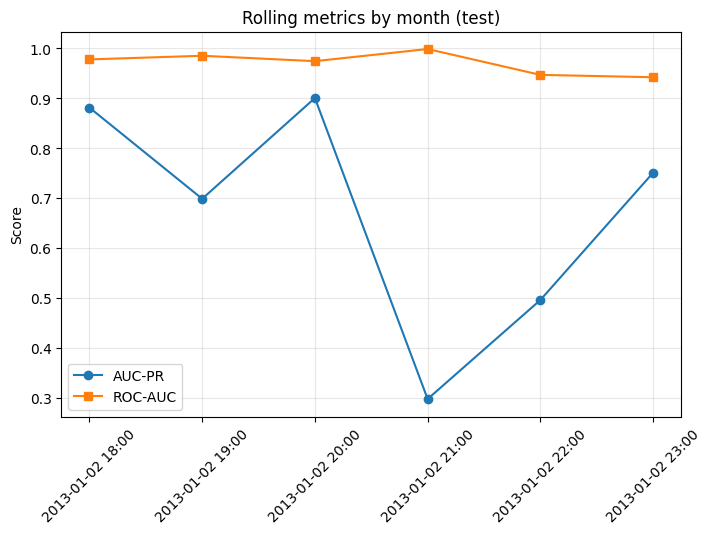

In [ ]:
plot_drift_trend(drift_metrics)

In [ ]:
from drift import compute_psi, psi_report

test = pd.read_csv("../data/processed/test.csv", parse_dates=["event_time"])
test["hour"] = test["event_time"].dt.to_period("H")

from src.drift import compute_psi
rows = []
for h, d in test.groupby("hour"):
    for f in feature_cols:
        psi = compute_psi(tr[f].values, d[f].values, bins=10)
        rows.append({"hour": str(h), "feature": f, "psi": psi})
psi_hourly = pd.DataFrame(rows)
psi_hourly.to_csv("psi_hourly.csv", index=False)

psi_hourly


/var/folders/zg/4k9h9dqx08q8fyj24lyqs5_40000gp/T/ipykernel_29494/1058003882.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  test["hour"] = test["event_time"].dt.to_period("H")


hour feature       psi
0    2013-01-02 18:00  Amount  0.009122
1    2013-01-02 18:00      V1  1.041634
2    2013-01-02 18:00      V2  0.017542
3    2013-01-02 18:00      V3  0.689091
4    2013-01-02 18:00      V4  0.147317
..                ...     ...       ...
169  2013-01-02 23:00     V24  0.160071
170  2013-01-02 23:00     V25  0.294419
171  2013-01-02 23:00     V26  0.158496
172  2013-01-02 23:00     V27  0.065505
173  2013-01-02 23:00     V28  0.488000

[174 rows x 3 columns]

In [ ]:
psi_report(tr, test, feature_cols)

feature       psi        status
0   Amount  0.022791        stable
1       V1  1.013949   major_drift
2       V2  0.021410        stable
3       V3  0.750410   major_drift
4       V4  0.147965  slight_drift
5       V5  0.167457  slight_drift
6       V6  0.067535        stable
7       V7  0.074196        stable
8       V8  0.042067        stable
9       V9  0.063418        stable
10     V10  0.033052        stable
11     V11  0.339354   major_drift
12     V12  0.217537  slight_drift
13     V13  0.040389        stable
14     V14  0.078788        stable
15     V15  0.217454  slight_drift
16     V16  0.010788        stable
17     V17  0.043387        stable
18     V18  0.027120        stable
19     V19  0.033796        stable
20     V20  0.054819        stable
21     V21  0.101316  slight_drift
22     V22  0.164284  slight_drift
23     V23  0.133208  slight_drift
24     V24  0.134309  slight_drift
25     V25  0.286284   major_drift
26     V26  0.145816  slight_drift
27     V27  0.043795        stable
28     V28  0.531906   major_drift

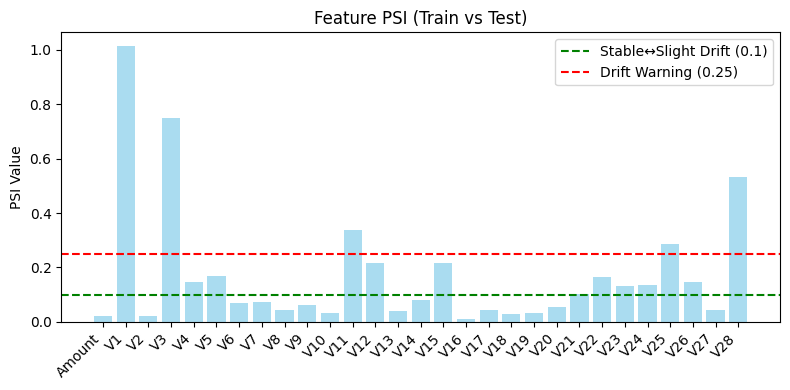

In [ ]:
import pandas as pd, matplotlib.pyplot as plt

df = pd.read_csv("psi_feature_metrics.csv")  # ‰Ω†ÁöÑ train‚Äìtest psi Êñá‰ª∂

plt.figure(figsize=(8,4))
plt.bar(df["feature"], df["psi"], color="skyblue", alpha=0.7)
plt.axhline(0.1, color="green", linestyle="--", label="Stable‚ÜîSlight Drift (0.1)")
plt.axhline(0.25, color="red", linestyle="--", label="Drift Warning (0.25)")
plt.ylabel("PSI Value")
plt.title("Feature PSI (Train vs Test)")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.savefig("figures/psi_features.png", dpi=170)
plt.show()



# Appendix / Draft Part

In [ ]:
# 1) ÊòéÁ°Æ Kaggle ÁâπÂæÅÔºà‰∏é app Á´Ø‰∏ÄËá¥Ôºâ
feature_cols = ["Amount"] + [c for c in tr.columns if c.startswith("V")]

# 2) Áî® ColumnTransformer Âõ∫ÂÆöÈÄâÂàó + Ê†áÂáÜÂåñÔºàÈÅøÂÖçÂ∞ÜÊù•Âàó‰∏ç‰∏ÄËá¥Ôºâ
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

preprocess = ColumnTransformer(
    transformers=[("num", StandardScaler(with_mean=True), feature_cols)],
    remainder="drop",
    verbose_feature_names_out=False
)

# 3) Â§çÁî®‰Ω† notebook ÈáåÂ∑≤ÁªèÊåëÂ•ΩÁöÑ‚ÄúÊúÄÁªàÊ®°Âûã‚Äù
#    ÔºàÂèØÁî®‰Ω†Â∑≤ÊúâÁöÑ try_build_lgbm()ÔºåÊàñÂ∑≤ËÆ≠ÁªÉÂ•ΩÁöÑ best_estimator_Ôºâ
from train import try_build_lgbm  # Â¶ÇÊûúÂáΩÊï∞Â∞±ÂÆö‰πâÂú® train.py
final_clf = try_build_lgbm()  # ‰∏æ‰æã
# ‰πüÂèØ‰ª•Áõ¥Êé•Áî®‰Ω†Â∑≤ÁªèfitËøáÁöÑ best_modelÔºàÂ¶Ç LogisticRegressionÔºâ
# final_clf = LogisticRegression(max_iter=3000, class_weight="balanced")

export_pipe = Pipeline([("prep", preprocess), ("clf", final_clf)])
export_pipe.fit(tr[feature_cols], tr["Class"])

# 4) ÂØºÂá∫
from pathlib import Path
import joblib, json, os
ROOT = Path.cwd().parents[0] if Path.cwd().name=="reports" else Path.cwd()
os.makedirs(ROOT/"models", exist_ok=True)
joblib.dump(export_pipe, ROOT/"models"/"lgbm_kaggle.joblib")

# ÂêåÊ≠•ÂÜôÂá∫ÁâπÂæÅÂàóÔºåapp Á´Ø‰ΩøÁî®
with open(ROOT/"models"/"kaggle_features.json", "w") as f:
    json.dump(feature_cols, f, indent=2)

print("Exported models/lgbm_kaggle.joblib with features:", len(feature_cols))


[LightGBM] [Info] Number of positive: 384, number of negative: 198981
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010762 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199365, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Exported models/lgbm_kaggle.joblib with features: 29


In [ ]:
tr

tx_id          event_time   Amount  Class        V1        V2  \
0            0 2013-01-01 00:00:00   149.62      0 -1.359807 -0.072781   
1            1 2013-01-01 00:00:00     2.69      0  1.191857  0.266151   
2            2 2013-01-01 00:00:01   378.66      0 -1.358354 -1.340163   
3            3 2013-01-01 00:00:01   123.50      0 -0.966272 -0.185226   
4            4 2013-01-01 00:00:02    69.99      0 -1.158233  0.877737   
...        ...                 ...      ...    ...       ...       ...   
199360  199360 2013-01-02 12:55:27    40.46      0  1.921305  0.395242   
199361  199361 2013-01-02 12:55:27    22.00      0 -0.638489  0.057029   
199362  199363 2013-01-02 12:55:28    40.29      0 -1.590313  1.185834   
199363  199362 2013-01-02 12:55:28  1745.40      0 -1.383590 -5.632354   
199364  199364 2013-01-02 12:55:29   118.58      0 -1.504565 -1.047164   

              V3        V4        V5        V6  ...       V19       V20  \
0       2.536347  1.378155 -0.338321  0.462388  ...  0.403993  0.251412   
1       0.166480  0.448154  0.060018 -0.082361  ... -0.145783 -0.069083   
2       1.773209  0.379780 -0.503198  1.800499  ... -2.261857  0.524980   
3       1.792993 -0.863291 -0.010309  1.247203  ... -1.232622 -0.208038   
4       1.548718  0.403034 -0.407193  0.095921  ...  0.803487  0.408542   
...          ...       ...       ...       ...  ...       ...       ...   
199360 -2.318680  1.398477  1.033023 -0.642820  ... -0.168052 -0.133742   
199361  1.022120 -1.267570  0.573539  0.253991  ...  1.743075  0.541960   
199362  0.929716 -0.429654 -0.092835 -0.578428  ...  0.192490  0.027154   
199363 -4.637217  1.364093 -0.042684  1.207176  ... -1.978109  3.161848   
199364  2.658591 -0.246340  0.342667  0.182682  ...  0.381220  0.560674   

             V21       V22       V23       V24       V25       V26       V27  \
0      -0.018307  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558   
1      -0.225775 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983   
2       0.247998  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353   
3      -0.108300  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723   
4      -0.009431  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422   
...          ...       ...       ...       ...       ...       ...       ...   
199360  0.037927  0.218286 -0.030503  0.589564  0.442069 -0.546391 -0.009510   
199361  0.311661  0.787535 -0.433117  0.161191  0.591464  0.193631  0.072301   
199362  0.257901  1.159285 -0.544732  0.043616  1.113819  0.208993 -0.109086   
199363  1.414935  0.395609 -1.539984 -0.423408 -0.330285  0.929866 -0.412846   
199364  0.371965  0.798937 -0.048231 -0.437821  0.412388 -0.085327 -0.131134   

             V28  
0      -0.021053  
1       0.014724  
2      -0.059752  
3       0.061458  
4       0.215153  
...          ...  
199360 -0.025723  
199361  0.100244  
199362 -0.126385  
199363  0.196356  
199364 -0.127378  

[199365 rows x 32 columns]

## Risk Memo and Model Card

### ÁõÆÊ†á‰∫ßÂá∫

| Êñá‰ª∂                          | ÂÜÖÂÆπ                          | ÂΩ¢Âºè                        |
| --------------------------- | --------------------------- | ------------------------- |
| **`reports/model_card.md`** | Ê®°ÂûãÂç°ÔºàModel CardÔºâ             | Markdown Êñá‰ª∂ÔºàÂèØÂú® GitHub Ê∏≤ÊüìÔºâ |
| **`reports/risk_memo.pdf`** | È£éÊéßÂ§áÂøòÂΩïÔºàRisk Management MemoÔºâ | PDF Êñá‰ª∂ÔºàËá™Âä®ÁîüÊàêÔºâ              |

> **Ê†∏ÂøÉÊÄùÊÉ≥**ÔºöÂÉèÁúüÂÆûÈ£éÊéßÂõ¢Èòü‰∏ÄÊ†∑ËÆ∞ÂΩïÊ®°ÂûãÁöÑÂÅáËÆæ„ÄÅÁî®ÈÄî„ÄÅÈôêÂà∂„ÄÅÁõëÊéßËÆ°Âàí„ÄÇ

**Model Card (Markdown)**

ÂÜÖÂÆπÂåÖÊã¨Ôºö

* Ê®°ÂûãÁî®ÈÄî„ÄÅÁõÆÊ†á‰∏éËåÉÂõ¥
* Êï∞ÊçÆÊèèËø∞ÔºàÊù•Ê∫ê„ÄÅÊ†∑Êú¨Â§ßÂ∞è„ÄÅÊó∂Èó¥Ë∑®Â∫¶Ôºâ
* Ê®°ÂûãÁªìÊûÑÔºàÁÆóÊ≥ï„ÄÅ‰∏ªË¶ÅÁâπÂæÅ„ÄÅÁõÆÊ†áÂèòÈáèÔºâ
* ËÆ≠ÁªÉ‰∏éÈ™åËØÅË°®Áé∞ÔºàAUC-PR, KS, Recall@Precision‚â•xÔºâ
* Ê†°ÂáÜ‰∏éÁ®≥ÂÆöÊÄßÔºàBrier„ÄÅPSIÔºâ
* ÂèØËß£ÈáäÊÄßÊÄªÁªìÔºàTop featuresÔºâ
* ÈôêÂà∂‰∏éÊΩúÂú®ÂÅèÂ∑ÆÔºàÊï∞ÊçÆ‰ª£Ë°®ÊÄß„ÄÅÊó∂ÊïàÊÄßÔºâ
* ÁõëÊéß‰∏éÂÜçËÆ≠ÁªÉËÆ°Âàí

‚Üí ËæìÂá∫Ôºö`reports/model_card.md`

---

**Risk Memo (PDF)**

ËøôÊòØ‰∏öÂä°ÂØºÂêëÁâàÊú¨ÔºàÈÄÇÂêàÈù¢ËØïÂ±ïÁ§∫ÔºâÔºö

* ÊëòË¶ÅÔºàÊ®°ÂûãÁõÆÊ†á + ‰∏öÂä°‰ª∑ÂÄºÔºâ
* ÊñπÊ≥ïËÆ∫ÔºàÊï∞ÊçÆÂ§ÑÁêÜ„ÄÅÁâπÂæÅÂ∑•Á®ã„ÄÅÁÆóÊ≥ïÔºâ
* ÊàêÊú¨ÊïèÊÑüÈòàÂÄº‰ºòÂåñÁ≠ñÁï•
* Á®≥ÂÆöÊÄß‰∏éÊºÇÁßªÁõëÊéßËÆæËÆ°ÔºàPSI ÂëäË≠¶ÈÄªËæëÔºâ
* ÂèØËß£ÈáäÊÄßÂ∫îÁî®ÔºàSHAP ÊÄªÁªì + Â±ÄÈÉ®Ëß£ÈáäÊ†∑‰æãÔºâ
* ÂÜçËÆ≠ÁªÉ‰∏éÊ®°ÂûãÊ≤ªÁêÜÁ≠ñÁï•
* ÈôÑÂΩïÔºöÂÖ≥ÈîÆÊåáÊ†áË°®Ê†ºÔºàAUC-PR„ÄÅKS„ÄÅRecall@Precision‚â•0.9 Á≠âÔºâ

‚Üí ËæìÂá∫Ôºö`reports/risk_memo.pdf`

---

## Risk MemoÁªìÊûÑ

| ÈÉ®ÂàÜ                                     | ÂÜÖÂÆπ                   | Á§∫‰æãÂ∞èËäÇ                                              |
| -------------------------------------- | -------------------- | ------------------------------------------------- |
| **1Ô∏è‚É£ Executive Summary**              | Ê®°ÂûãÁõÆÊ†á‰∏é‰∏öÂä°‰ª∑ÂÄº            | „ÄåÊûÑÂª∫‰ø°Áî®Âç°Ê¨∫ËØàÊ£ÄÊµãÊ®°ÂûãÔºå‰ª•Á≤æÂáÜËØÜÂà´È´òÈ£éÈô©‰∫§ÊòìÂπ∂ÊèêÂçá‰∫§ÊòìÂÆ°Ê†∏ÊïàÁéá„ÄÇ„Äç                |
| **2Ô∏è‚É£ Data & Pre-processing**          | Êï∞ÊçÆÊù•Ê∫ê„ÄÅÊ∏ÖÊ¥ó„ÄÅÁâπÂæÅÊûÑÂª∫„ÄÅÈò≤Ê≥ÑÈú≤ËÆæËÆ°   | Kaggle Credit Card Fraud DatasetÔºåÊó∂Èó¥ÂàáÂàÜ„ÄÅÊ†áÂáÜÂåñ„ÄÅÁ±ªÂà´‰∏çÂùáË°°ËØÑ‰º∞ |
| **3Ô∏è‚É£ Model Methodology**              | ÁÆóÊ≥ï„ÄÅPipeline„ÄÅÈòàÂÄº‰ºòÂåñÁ≠ñÁï•   | Logistic Regression / LightGBM + ÊàêÊú¨ÊïèÊÑüÈòàÂÄº‰ºòÂåñ         |
| **4Ô∏è‚É£ Performance & Calibration**      | ‰∏ªÊåáÊ†á„ÄÅÊ†°ÂáÜÁªìÊûú„ÄÅ‰∏öÂä°Ëß£Èáä        | AUC-PR„ÄÅKS„ÄÅBrier Score Á≠â                           |
| **5Ô∏è‚É£ Stability & Drift Monitoring**   | PSI ÂëäË≠¶ÈÄªËæë„ÄÅÁ®≥ÂÆöÊÄßËØÑ‰º∞       | „ÄåPSI > 0.25 Ëß¶ÂèëÁâπÂæÅÊºÇÁßªÈ¢ÑË≠¶„Äç                             |
| **6Ô∏è‚É£ Explainability (SHAP)**          | ÂÖ®Â±Ä / Â±ÄÈÉ®Ëß£Èáä‰∏éÁ≠ñÁï•Âª∫ËÆÆ       | „ÄåÈ´òÈáëÈ¢ù + Ê∑±Â§ú‰∫§Êòì ‚Üí ÈáçÁÇπ‰∫∫Â∑•ÂÆ°Ê†∏„Äç                             |
| **7Ô∏è‚É£ Governance & Retraining Plan**   | ÂÜçËÆ≠ÁªÉÈ¢ëÁéá„ÄÅÊ®°ÂûãÊñáÊ°£Âåñ‰∏éÂêàËßÑÊÄß      | ÂçäÂπ¥‰∏ÄÊ¨°ÊªöÂä®ËØÑ‰º∞ + Ëá™Âä® PSI ÁõëÊéß                              |
| **8Ô∏è‚É£ Appendix (Key Metrics & Plots)** | ÂµåÂÖ• ROC / PR / SHAP Âõæ | ‰ªé `reports/figures/*.png` Ëá™Âä®ÊèíÂÖ•                    |
